# Analysis and Conclusions

This notebook includes EDA, main data analysis, and the conclusions of this project.

In [1]:
# General imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting_code import make_quadrant_chart, quadrant_chart

## Exploratory Data Analysis (EDA)

As a first step, I will read in the cleaned data, making sure to read the `district_id` column as a string.

In [2]:
df = pd.read_csv('../data/cleaned_data.csv',
                 dtype={'district_id': str})
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_id        508 non-null    object 
 1   district_name      508 non-null    object 
 2   count_schools      508 non-null    int64  
 3   count_students     508 non-null    int64  
 4   count_students_12  508 non-null    int64  
 5   sat_participation  508 non-null    float64
 6   act_participation  508 non-null    float64
 7   pct_urm            508 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 31.9+ KB


,district_id,district_name,count_schools,count_students,count_students_12,sat_participation,act_participation,pct_urm
0,0161176,Fremont Unified,42,35176,2537,0.33,0.20,0.16
1,0161275,Piedmont City Unified,6,2596,231,0.34,0.50,0.10
2,0161291,San Leandro Unified,12,8926,754,0.26,0.10,0.61
3,1062166,Fresno Unified,105,70749,4593,0.23,0.12,0.78
4,1075127,Mendota Unified,7,3543,234,0.29,0.35,0.97


Below are some additional **summary statistics:**

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count_schools,508.0,15.602362,47.615481,1.00,4.0000,8.00,16.00,1008.00
count_students,508.0,8957.025591,22942.361639,7.00,926.0000,3462.00,10548.50,453276.00
count_students_12,508.0,955.994094,2219.602338,13.00,130.5000,359.00,1120.50,41873.00
sat_participation,508.0,0.273366,0.163625,0.00,0.1800,0.28,0.35,0.94
act_participation,508.0,0.146831,0.153308,0.00,0.0500,0.11,0.20,1.00
pct_urm,508.0,0.552106,0.256643,0.07,0.3375,0.55,0.78,1.00


 *A specific ask for this project:*
 <br>Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.
 <br>First I'll bring the function back in:

In [4]:
def my_mean(vals):
    # This function takes a list or tuple of numbers and returns the mean.
    return sum(x for x in vals) / len(vals)

def my_stdev(vals):
    # This function takes a list or tuple of numbers and returns the standard deviation.
    n = len(vals)    
    mu = my_mean(vals)  # Use my_mean function defined earlier
    return (sum((x - mu) ** 2 for x in vals) / n) ** 0.5

Now I will apply it to each numeric column of the dataframe.

In [5]:
numeric_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]
sd = {col_name: my_stdev(df[col_name]) for col_name in numeric_cols}
sd

{'count_schools': 47.56859276920053,
 'count_students': 22919.769450900145,
 'count_students_12': 2217.4166137515754,
 'sat_participation': 0.16346364122710594,
 'act_participation': 0.15315704873319788,
 'pct_urm': 0.25639016719510843}

One thing I immediately notice is the standard deviation for `count_schools`, `count_students`, and `count_students_12`. The values for this are really large!
<br> I'm going to **plot histograms** to see what all of the distributions look like.

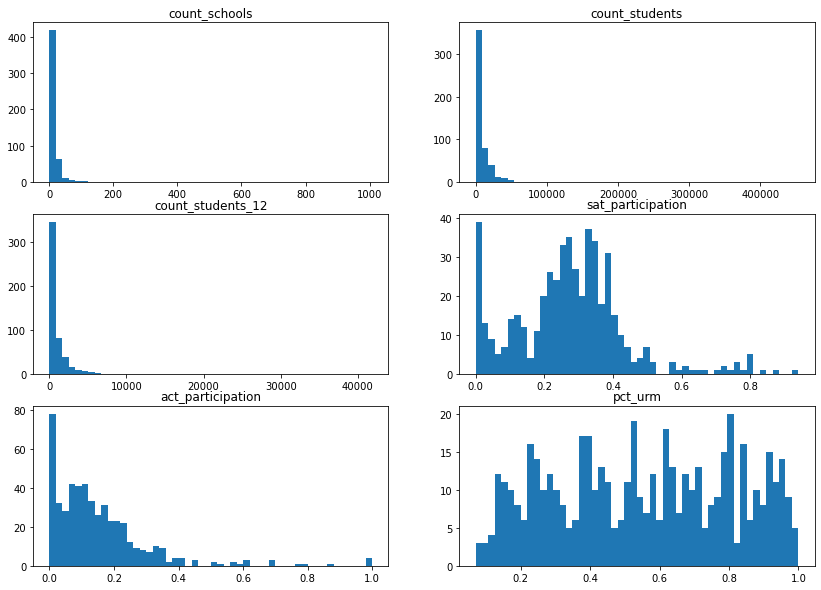

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
axs = axs.ravel()  # Smash the axes into a 1D array
for i, col in enumerate(numeric_cols):
    axs[i].hist(df[col], bins=50)
    axs[i].set_title(col)

It looks like the standard deviation for `count_schools`, `count_students`, and `count_students_12` is so large because while most districts are very small, there are a few really large districts that are skewing the distribution.
<br>Distribution for `sat_participation` seems to peak at around 30%, with another peak at 0%. The `act_participation` peaks at 0% and drops off from there.
<br>`pct_urm` seems evenly distributed from 0 to 1.
<br><br> Next we'll look at a **heatmap** to see possible relationships between features.

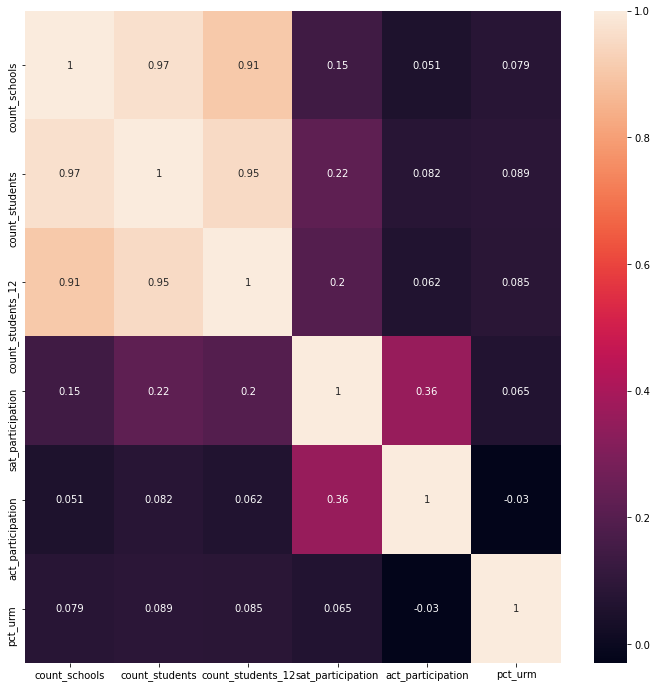

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True);

The heatmap shows features like `count_schools`, `count_students`, and `count_students_12` to be highly correlated. This is expected because a district with more schools is likely to have more students.
<br>There is a moderate correlation between SAT and ACT participation.
<br>Participation in either test is not strongly correlated with `pct_urm`

Next, I will create **box plots** for the numerical features.
<br>At this point, I've decided it will be the most valuable to the California Department of Education if I only consider the 25 largest school districts with respect to number of enrolled high school seniors.
<br>This eliminates a lot of districts that are too small for the department's studies.

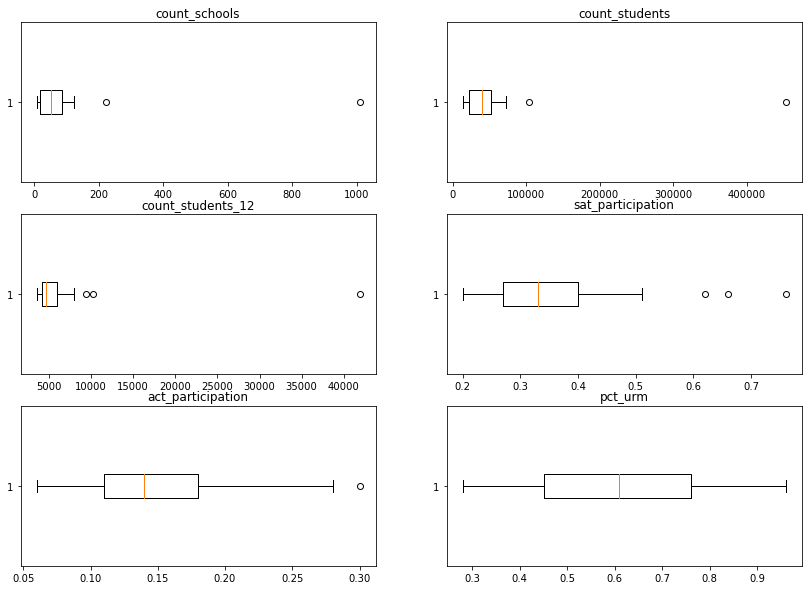

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
axs = axs.ravel()  # Smash the axes into a 1D array
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df.sort_values('count_students_12', ascending=False).head(25)[col], vert=False)
    axs[i].set_title(col)

I'm interested to know **which school district is the large outlier** in terms of number of schools and students.

In [9]:
df.sort_values('count_students_12', ascending=False).head()

,district_id,district_name,count_schools,count_students,count_students_12,sat_participation,act_participation,pct_urm
300,1964733,Los Angeles Unified,1008,453276,41873,0.48,0.22,0.86
162,1563529,Kern High,24,39884,10175,0.27,0.07,0.73
382,3768338,San Diego Unified,222,103194,9418,0.36,0.21,0.52
475,3768411,Sweetwater Union High,30,39165,7934,0.33,0.12,0.76
177,4369427,East Side Union High,26,22606,6785,0.35,0.11,0.46


It appears the **Los Angeles Unified School District** is an outlier when it comes to enrolled students. They have about 4x the enrolled high school seniors as the next largest district.

Based on my problem statement, I already know the main visualization I want to produce is **two scatter charts** that are separated into quadrants. These charts will help identify districts with high proportions of URM students, and low participation rates in the SAT and ACT. I will also summarize the findings in a table.
<br><br>I wrote a custom function to make this plotting a little cleaner. You can find it in [`plotting_code.py`](./plotting_code.py)

In [10]:
# Just looking at the top 25 schools by enrolled high school seniors.
# Storing as it's own dataframe for ease of use.
df_25 = df.sort_values('count_students_12', ascending=False).head(25)

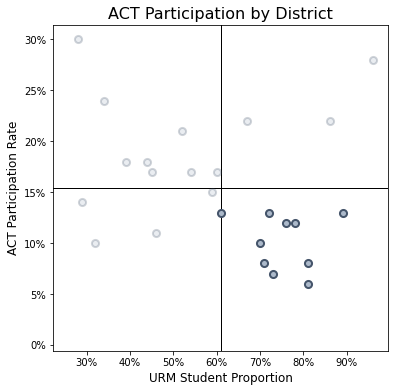

In [11]:
make_quadrant_chart(df_25['pct_urm'], df_25['act_participation'],
                   xlabel='URM Student Proportion',
                   ylabel ='ACT Participation Rate',
                    figsize=(6, 6),
                   highlight_quadrant=4,
                    
# Uncomment to actually save the file
#                    fname='act_participation.png', 
                    
                   title='ACT Participation by District')

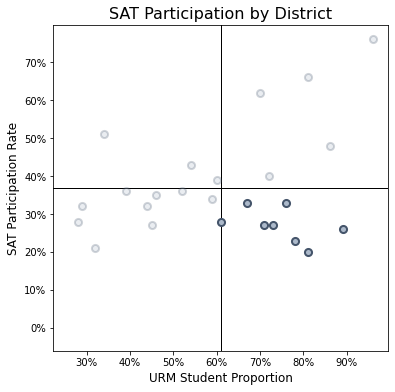

In [12]:
make_quadrant_chart(df_25['pct_urm'], df_25['sat_participation'],
                   xlabel='URM Student Proportion',
                   ylabel ='SAT Participation Rate',
                    figsize=(6, 6),
                   highlight_quadrant=4,
                    
# Uncomment to actually save the file
#                    fname='act_participation.png', 
                    
                   title='SAT Participation by District')

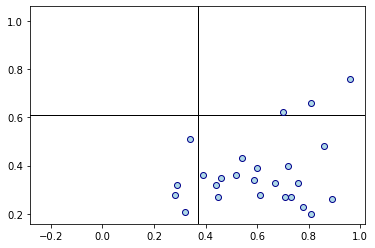

In [15]:
quadrant_chart(df_25['pct_urm'], df_25['sat_participation'])

In [13]:
districts_of_interest = df_25[(df_25['pct_urm'] >= df_25['pct_urm'].mean()) & 
     ((df_25['sat_participation'] < df_25['sat_participation'].mean()) |
     (df_25['act_participation'] < df_25['act_participation'].mean()))].copy()


districts_of_interest.reset_index(inplace=True, drop=True)

sat_mask = districts_of_interest['sat_participation'] < df_25['sat_participation'].mean()
act_mask = districts_of_interest['act_participation'] < df_25['act_participation'].mean()

districts_of_interest['below_avg'] = pd.Series(['SAT, ACT'] * 11).mask(~sat_mask, 'ACT').mask(~act_mask, 'SAT')

In [14]:
table = districts_of_interest.drop('district_id', 1).sort_values(['below_avg', 'count_students_12'], ascending=False)
table.columns=['District', 'Count Schools', 'Count Students', 'Count Students (Grade 12)', 'SAT Participation', 'ACT Participation', 'Percent URM', 'Below Average Participation']
table

,District,Count Schools,Count Students,Count Students (Grade 12),SAT Participation,ACT Participation,Percent URM,Below Average Participation
0,Kern High,24,39884,10175,0.27,0.07,0.73,"SAT, ACT"
1,Sweetwater Union High,30,39165,7934,0.33,0.12,0.76,"SAT, ACT"
4,Antelope Valley Union High,14,21077,5657,0.20,0.06,0.81,"SAT, ACT"
5,Anaheim Union High,20,30292,5479,0.27,0.08,0.71,"SAT, ACT"
6,Fresno Unified,105,70749,4593,0.23,0.12,0.78,"SAT, ACT"
8,Modesto City High,9,15122,3858,0.28,0.13,0.61,"SAT, ACT"
10,San Bernardino City Unified,87,48936,3558,0.26,0.13,0.89,"SAT, ACT"
9,Oakland Unified,123,36524,3663,0.33,0.22,0.67,SAT
2,Chaffey Joint Union High,11,23883,6046,0.40,0.13,0.72,ACT
3,Long Beach Unified,85,72935,5929,0.62,0.10,0.70,ACT


## Conclusions and Recommendations
The California Department of Education should use the findings above to guide their research on educational inequity. The 11 school districts listed in the table are good starting points for research because they have higher-than-average proportions of students from URM groups, and lower than average participation rates for one or more college admissions tests. This project does not identify a correlation between test participation and the percentage of URM students in a district. It simply provides a refined list of districts which could provide the most value for research.